# Example data for practice analysis

### Import the libraries

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### Import training data and clean problematic columns

In [2]:
df = pd.read_csv (r'/Users/maxattard/Desktop/DATA ANALYSIS/Python/IBM/Data/Loan.csv', skiprows=9)
df.rename(columns={"Gender\\": "Gender"}, inplace = True)
#df["Gender"] = df["Gender"].str[0]
df.replace(r'\\','', regex=True, inplace=True)
df.replace(r'}','', regex=True, inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [3]:
df.shape

(346, 10)

In [4]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [5]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

### Import seaborn for visual analysis

In [6]:
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



### View principal amount by gender for possible insight

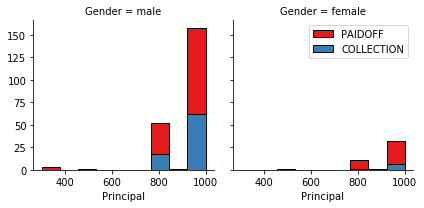

In [7]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

### View loan status by age and gender for possible insight

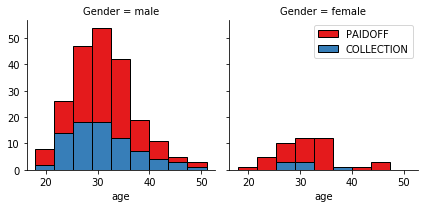

In [8]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

### Using datetime data, view dof of week for possible insight

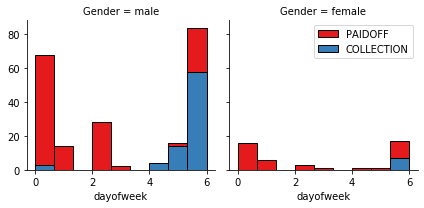

In [9]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

### End of week has increased collection numbers
### Create new column to include weekend

In [10]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


### View summary gender by loan status

In [11]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

### Set gender to binary

In [12]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


### View summary education by loan status

In [13]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

### one hot education (remove "masters or above" as 0)

In [14]:
df[['Principal','terms','age','Gender','education']].head()
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Define x and y for analysis. Where y is loan status

In [15]:
X = Feature
y = df['loan_status'].values

### Normalise X for analysis

In [16]:
X= preprocessing.StandardScaler().fit(X).transform(X)

# KNN

### Train test split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4)

### find best K

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = [];
for n in range (1, Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

print("best k = ", mean_acc.argmax()+1)
print("with accuracy =", mean_acc.max())

best k =  7
with accuracy = 0.7857142857142857


In [19]:
k = 7
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
yhat = neigh.predict(X_test)

In [20]:
print(metrics.accuracy_score(y_train, neigh.predict(X_train)))
print(metrics.accuracy_score(y_test, yhat))

0.8079710144927537
0.7857142857142857


# Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dec_tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
pred_tree = dec_tree.predict(X_test)
print(metrics.accuracy_score(y_test, pred_tree))

0.6142857142857143


### Visualisation of tree

Solving environment: | 
  - anaconda/osx-64::ca-certificates-2020.1.1-0, anaconda/osx-64::certifi-2019.11.28-py37_0, anaconda/osx-64::openssl-1.1.1d-h1de35cc_4
  - anaconda/osx-64::certifi-2019.11.28-py37_0, anaconda/osx-64::openssl-1.1.1d-h1de35cc_4, defaults/osx-64::ca-certificates-2020.1.1-0
  - anaconda/osx-64::ca-certificates-2020.1.1-0, anaconda/osx-64::openssl-1.1.1d-h1de35cc_4, defaults/osx-64::certifi-2019.11.28-py37_0
  - anaconda/osx-64::openssl-1.1.1d-h1de35cc_4, defaults/osx-64::ca-certificates-2020.1.1-0, defaults/osx-64::certifi-2019.11.28-py37_0
  - anaconda/osx-64::ca-certificates-2020.1.1-0, defaults/osx-64::certifi-2019.11.28-py37_0, defaults/osx-64::openssl-1.1.1d-h1de35cc_4
  - defaults/osx-64::ca-certificates-2020.1.1-0, defaults/osx-64::certifi-2019.11.28-py37_0, defaults/osx-64::openssl-1.1.1d-h1de35cc_4
  - anaconda/osx-64::ca-certificates-2020.1.1-0, anaconda/osx-64::certifi-2019.11.28-py37_0, defaults/osx-64::openssl-1.1.1d-h1de35cc_4
  - anaconda/osx-64::cer

/Users/maxattard/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


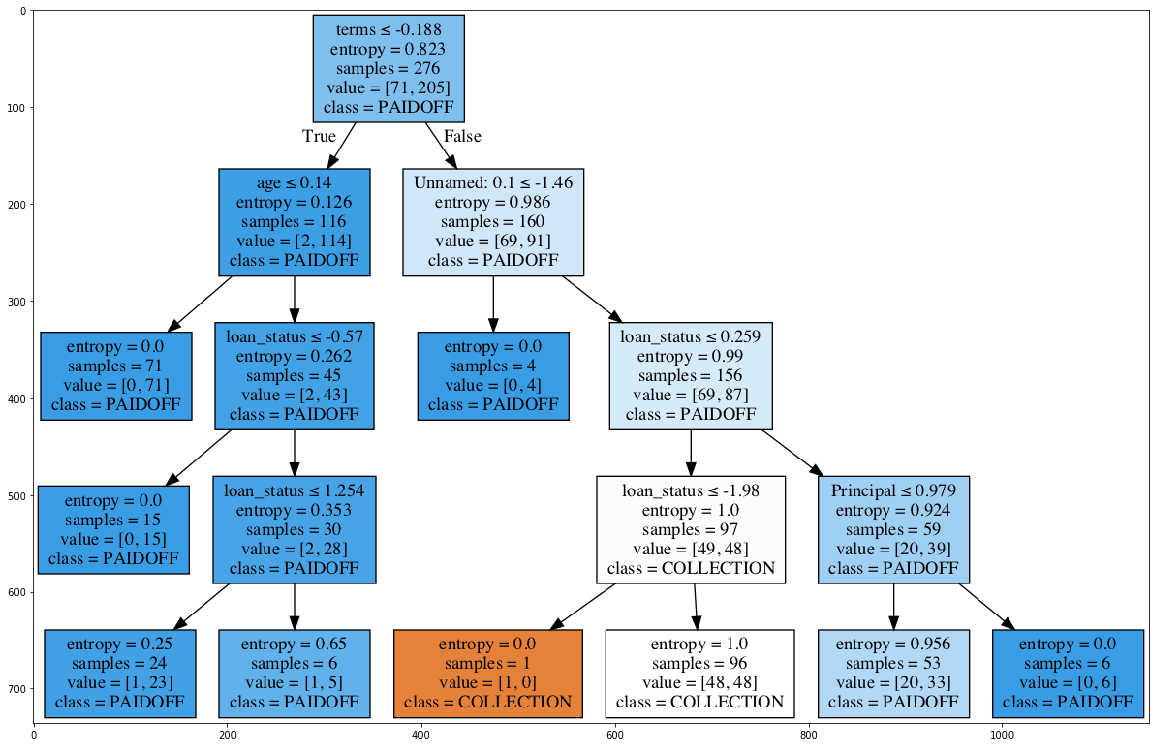

In [24]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

dot_data = StringIO()
filename = "decisiontree.png"
featureNames = df.columns[0:8]
targetNames = df['loan_status'].unique().tolist()
out = tree.export_graphviz(dec_tree, feature_names = featureNames, out_file = dot_data, class_names = np.unique(y_train), filled = True, special_characters = True, rotate = False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize = (20,20))
plt.imshow(img,interpolation = 'nearest')

# SVM

### Choose kernel

In [25]:
from sklearn import svm
list = ['linear', 'poly', 'rbf', 'sigmoid']
for element in list:
    vector = svm.SVC(kernel=element)
    vector.fit(X_train, y_train)
    yhat = vector.predict(X_test)
    print (element, metrics.accuracy_score(y_test, yhat))

linear 0.7857142857142857
poly 0.7714285714285715
rbf 0.7428571428571429
sigmoid 0.7428571428571429


In [26]:
clf = svm.SVC(kernel = 'linear')
clf.fit(X_train, y_train)
yhat_sv = clf.predict(X_test)
yhat_sv [0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C = 0.01, solver = 'liblinear').fit(X_train, y_train)
yhat_lr = LR.predict(X_test)
yhat_lr_prob = LR.predict_proba(X_test)
yhat_lr_prob[0:5]

array([[0.5034238 , 0.4965762 ],
       [0.45206111, 0.54793889],
       [0.30814132, 0.69185868],
       [0.34259428, 0.65740572],
       [0.32025894, 0.67974106]])

# Models have been trained. Now we test on test data set

In [30]:
test_df = pd.read_csv (r'/Users/maxattard/Desktop/DATA ANALYSIS/Python/IBM/Data/Loan- Test.csv', skiprows=9)
test_df.rename(columns={"Gender\\": "Gender"}, inplace = True)
test_df.replace(r'\\','', regex=True, inplace=True)
test_df.replace(r'}','', regex=True, inplace=True)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


### Cleaning

In [31]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df[['Principal','terms','age','Gender','education']].head()
test_feature = test_df[['Principal','terms','age','Gender','weekend']]
test_feature = pd.concat([test_feature,pd.get_dummies(test_df['education'])], axis=1)
test_feature.drop(['Master or Above'], axis = 1,inplace=True)
test_feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [32]:
X1 = test_feature
y1 = test_df['loan_status'].values
X1= preprocessing.StandardScaler().fit(X1).transform(X1)

In [33]:
k = 7
yhat1 = neigh.predict(X1)
print(metrics.accuracy_score(y1, yhat1))

pred_tree1 = dec_tree.predict(X1)
print(metrics.accuracy_score(y1, pred_tree1))

yhat_sv1 = clf.predict(X1)
print(yhat_sv1[0:5])

yhat_lr1 = LR.predict(X1)
yhat_lr_prob1 = LR.predict_proba(X1)
print(yhat_lr_prob1[0:5])

0.6666666666666666
0.7222222222222222
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
[[0.24523466 0.75476534]
 [0.40836323 0.59163677]
 [0.428088   0.571912  ]
 [0.50550113 0.49449887]
 [0.45560894 0.54439106]]


In [35]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [37]:
dff = pd.DataFrame(columns = ('Algorithm', 'Jaccard', 'F1-score', 'LogLoss'))
dff['Algorithm'] = ('KNN', 'Decision Tree', 'SVM', 'Logistic Regression')
dff['Jaccard'] = (jaccard_similarity_score(y1, yhat1), jaccard_similarity_score(y1, pred_tree1), jaccard_similarity_score(y1, yhat_sv1), jaccard_similarity_score(y1, yhat_lr1))
dff['F1-score'] = (f1_score(y1, yhat1, average = 'weighted'), f1_score(y1, pred_tree1, average = 'weighted'), f1_score(y1, yhat_sv1, average = 'weighted'), f1_score(y1, yhat_lr1, average = 'weighted'))
dff['LogLoss'] = ('NA', 'NA', 'NA', log_loss(y1, yhat_lr_prob1))
dff

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.666667,0.632840,NA
1,Decision Tree,0.722222,0.736682,NA
2,SVM,0.740741,0.630418,NA
3,Logistic Regression,0.740741,0.660427,0.567215


### I would use either decision tree or logistic regression.